# 概要

このドキュメントはjig-py をJupyterLab Notebook上で利用するためのクイックスタートガイドです。

jig-py 自身のリポジトリを解析対象として、Jigライブラリの利用方法をお伝えします

## 準備

次の準備が整った状態を想定しています。

* jig-pyとGraphvizのインストールを完了
* jig-pyのリポジトリをダウンロードし、リポジトリのディレクトリに移動
* JupyterLab を起動し、新規Notebookを開いた状態

## 流れ

* Pythonアプリケーションのモジュール依存性の可視化
* モジュールの掘り下げ
* モジュールの削除
* 特定のモジュールのみにフォーカスする
* リセット（初期状態に戻す）
* ノードのスタイルを変更する
* エッジのスタイルを変更する
* スタイルをリセットする
* 自動ハイライト（試験的な機能）

では、早速見ていきましょう。

## 解析の開始

Jigクラスをインポートし、`analyze_module_dependency()` メソッドに解析対象のアプリケーションのルートディレクトリを指定してグラフコントローラーオブジェクトを取得します。

アプリケーション内の任意のディレクトリを指定することはできないので注意してください（解析がうまくいかずエラーになるなど正しい挙動で動きません）。

取得したオブジェクトを直接Notebook上で評価するとモジュールの依存グラフが表示されます。

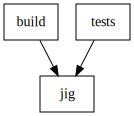

In [18]:
# ji-pyリポジトリのルートにいる前提なので、カレントディレクトリを指定

from jig import Jig
g = Jig.analyze_module_dependency(".")
g

## グラフ表示について

ノードがモジュールを表し、矢印がモジュール同士の依存関係を示しています。
`tests -> jig` は `tests` モジュール（パッケージ）が `jig` に依存していることを表します。

また、ノードの形によってそれ以上掘り下げるかどうかが分かります。
ノードの形が四角い場合は、掘り下げが可能です。掘り下げできない場合は楕円で表示されます。

## モジュールの掘り下げ

モジュール（ノード）を掘り下げるには `dig()` メソッドに掘り下げたいモジュール名を指定します。

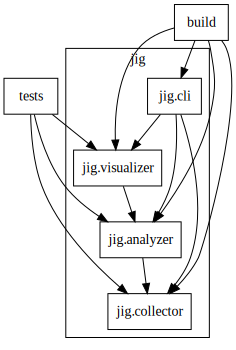

In [19]:
g.dig("jig")

複数同時に掘り下げることもできます。

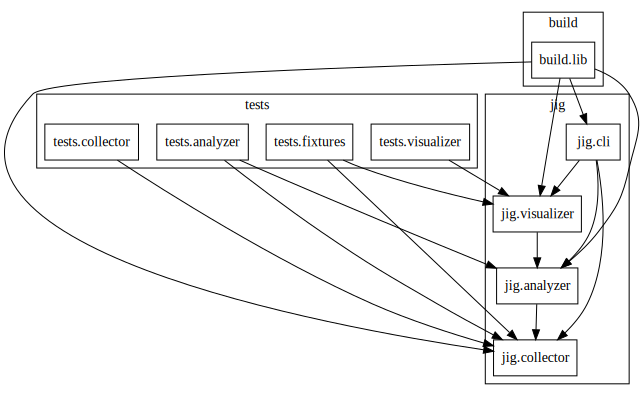

In [20]:
g.dig("tests", "build")

## モジュールの削除

削除したい場合は `remove()` にモジュール名を指定して呼び出します（複数指定可能）。

掘り下げたモジュールの名前を指定して、その内部にあるモジュールごとまとめて削除することもできます。

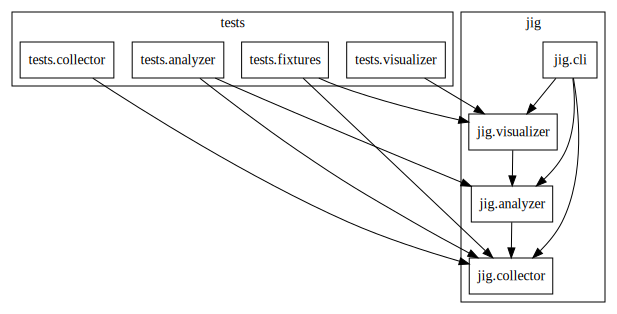

In [21]:
g.remove("build.lib")

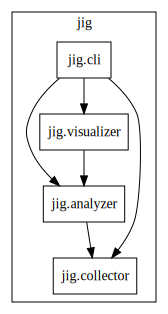

In [22]:
g.remove("tests")

## 特定のモジュールのみにフォーカスする

特定のモジュールのみにフォーカスしてみたい場合は、 `focus()` を利用します。

任意の数のモジュール名を指定できます。

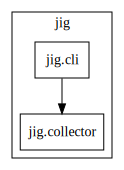

In [9]:
g.focus("jig.cli", "jig.collector")

## リセット（初期状態に戻す）

解析を最初からやり直したい場合は `reset()` で最初の状態に戻すことができます。

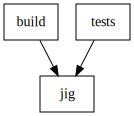

In [10]:
g.reset()

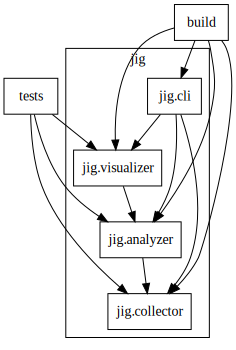

In [11]:
g.dig("jig")

## ノードのスタイル指定

ノードのスタイルを変更するには `style()` を利用します。

スタイルは `color`, `fontcolor`, `penwidth` が指定できます。

`color` および `fontcolor` には以下の値が設定できます。

* "white"
* "black"
* "darkgray"
* "lightgray"
* "red"
* "blue"
* "green"
* "yellow"
* "purple"
* "teal"
* "navy"

`penwidth` には以下の値が設定できます。

* "normal"
* "bold"
* "thin"


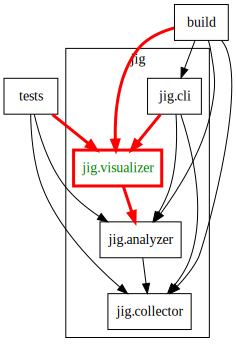

In [13]:
g.style("jig.visualizer", color="red", fontcolor="green", penwidth="bold")

## エッジのスタイルを変更する

`edge_style()` を呼ぶことで特定のモジュールをつなぐエッジのスタイルを変更できます。

スタイルは `color` と `penwidth` を指定することができます。

指定できる値については `style()` で指定できるものと同じです。


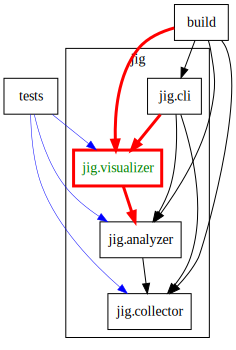

In [14]:
g.edge_style("tests", "jig", color="blue", penwidth="thin")

## スタイルのリセット

設定したスタイルを元に戻したい場合は、 `reset_style()` で戻すことができます。

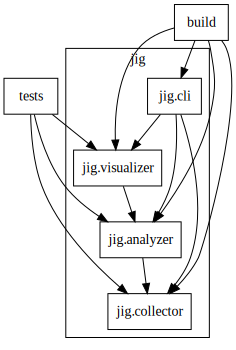

In [15]:
g.reset_style()

## 自動ハイライト機能

試験的な機能として自動ハイライト機能があります。

以下の条件を検出して、自動でノードおよびエッジのスタイルを設定します。

* 相互参照しているモジュールのエッジ
* 参照しかしていないモジュール（自分に向いている矢印がない）
* 依存しかされていないモジュール（自分から出て行く矢印がない）

実行するには `auto_highlight()` を呼び出します。

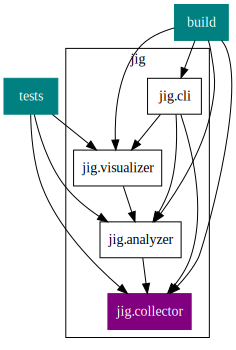

In [16]:
g.auto_highlight()

# おつかれさまでした！

クイックスタートガイドは以上になります。

是非、自分のプロジェクトを分析してみてください！